In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('train.xlsx')

test = pd.read_excel('test.xlsx')

datasets = [train, test]

In [3]:
train.tail()

,Dia,Hora,Valor,Cartão,CBK
11123,2015-05-30 23:07:01,2015-05-30 23:07:01.000,53.0,514868******7409,Não
11124,2015-05-30 23:08:47,2015-05-30 23:08:47.000,15.0,439354******5281,Não
11125,2015-05-30 23:15:24,2015-05-30 23:15:24.000,20.0,549167******1648,Não
11126,2015-05-30 23:17:41,2015-05-30 23:17:41.000,70.0,518759******8384,Não
11127,2015-05-30 23:51:31,2015-05-30 23:51:31.000,20.0,518759******0329,Não


In [4]:
train.head()

,Dia,Hora,Valor,Cartão,CBK
0,2015-05-01,00:01:54,36.54,536518******2108,Não
1,2015-05-01,00:03:46,36.54,536518******2108,Não
2,2015-05-01,00:08:50,69.00,453211******1239,Não
3,2015-05-01,00:27:00,193.43,548827******1705,Não
4,2015-05-01,01:32:46,132.00,531681******9778,Não


In [5]:
test.tail()

,Dia,Hora,Valor,Cartão,CBK
11815,2015-06-29,23:33:15,161.00,406669******8294,NaN
11816,2015-06-29,23:38:18,103.50,490172******5444,NaN
11817,2015-06-29,23:40:11,60.89,498407******2600,NaN
11818,2015-06-29,23:49:48,46.00,467149******3146,NaN
11819,2015-06-29,23:53:44,77.00,470598******4504,NaN


In [6]:
train = train.astype(str)
train['Dia'] = train.Dia.str[:10]
train['Hora'] = pd.to_datetime(train['Hora'])
train['Periodo'] = 0

train.loc[(train['Hora'].dt.hour >=6) & 
            (train['Hora'].dt.hour < 12), 'Periodo']='Manha'
train.loc[(train['Hora'].dt.hour >=12) & 
            (train['Hora'].dt.hour < 18), 'Periodo']='Tarde'
train.loc[(train['Hora'].dt.hour >=18) & 
            (train['Hora'].dt.hour < 24), 'Periodo']='Noite'
train.loc[(train['Hora'].dt.hour >=0) & 
            (train['Hora'].dt.hour < 6), 'Periodo']='Madrugada'

new = train['Cartão'].str.split('*',n = 1, expand = True)

train["First_digits"]= new[0] 
train["Last_digits"]= new[1]
train["Last_digits"]= train.Last_digits.str[5:9]
train['Cartão'] = train["First_digits"] + train["Last_digits"]

del train['First_digits']
del train['Last_digits']

train['Hora'] = [d.time() for d in train['Hora']]

In [7]:
test = test.astype(str)
test['Hora'] = pd.to_datetime(test['Hora'])
test['Periodo'] = 0

test.loc[(test['Hora'].dt.hour >=6) & 
            (test['Hora'].dt.hour < 12), 'Periodo']='Manha'
test.loc[(test['Hora'].dt.hour >=12) & 
            (test['Hora'].dt.hour < 18), 'Periodo']='Tarde'
test.loc[(test['Hora'].dt.hour >=18) & 
            (test['Hora'].dt.hour < 24), 'Periodo']='Noite'
test.loc[(test['Hora'].dt.hour >=0) & 
            (test['Hora'].dt.hour < 6), 'Periodo']='Madrugada'

new = test['Cartão'].str.split('*',n = 1, expand = True)

test["First_digits"]= new[0] 
test["Last_digits"]= new[1]
test["Last_digits"]= test.Last_digits.str[5:9]
test['Cartão'] = test["First_digits"] + test["Last_digits"]

del test['First_digits']
del test['Last_digits']

test['Hora'] = [d.time() for d in test['Hora']]

In [8]:
train['CBK'] = train['CBK'].map( {'Não': 0, 'Sim': 1} ).astype(int)

In [9]:
train.tail()

,Dia,Hora,Valor,Cartão,CBK,Periodo
11123,2015-05-30,23:07:01,53.0,5148687409,0,Noite
11124,2015-05-30,23:08:47,15.0,4393545281,0,Noite
11125,2015-05-30,23:15:24,20.0,5491671648,0,Noite
11126,2015-05-30,23:17:41,70.0,5187598384,0,Noite
11127,2015-05-30,23:51:31,20.0,5187590329,0,Noite


In [10]:
test.tail()

,Dia,Hora,Valor,Cartão,CBK,Periodo
11815,2015-06-29,23:33:15,161.0,4066698294,nan,Noite
11816,2015-06-29,23:38:18,103.5,4901725444,nan,Noite
11817,2015-06-29,23:40:11,60.89,4984072600,nan,Noite
11818,2015-06-29,23:49:48,46.0,4671493146,nan,Noite
11819,2015-06-29,23:53:44,77.0,4705984504,nan,Noite


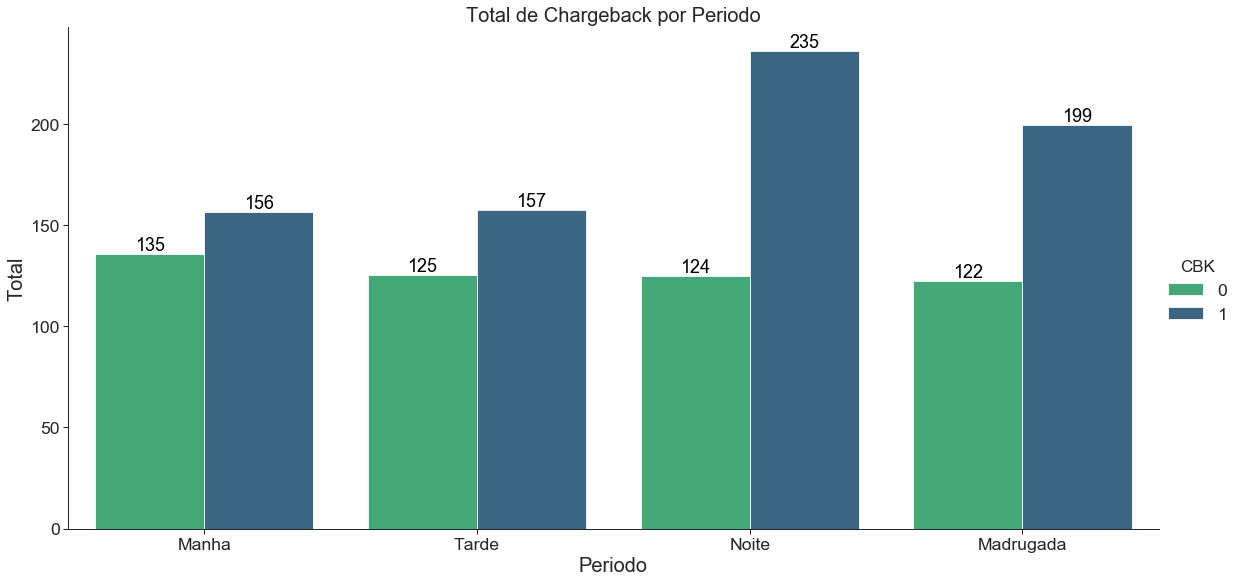

In [11]:
train['Valor'] = train['Valor'].astype('float')
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_style('ticks')
sns.catplot(x='Periodo', y='Valor', 
            hue='CBK', 
            palette = "viridis_r",
            ci = None,
            data=train, 
            height=8.27, 
            aspect=20/10,
            order=['Manha','Tarde','Noite','Madrugada'],
            kind='bar')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=18, color='black', ha='center', va='bottom')
plt.xlabel('Periodo')
plt.ylabel('Total')
plt.title('Total de Chargeback por Periodo')
#sns.despine()
plt.show()

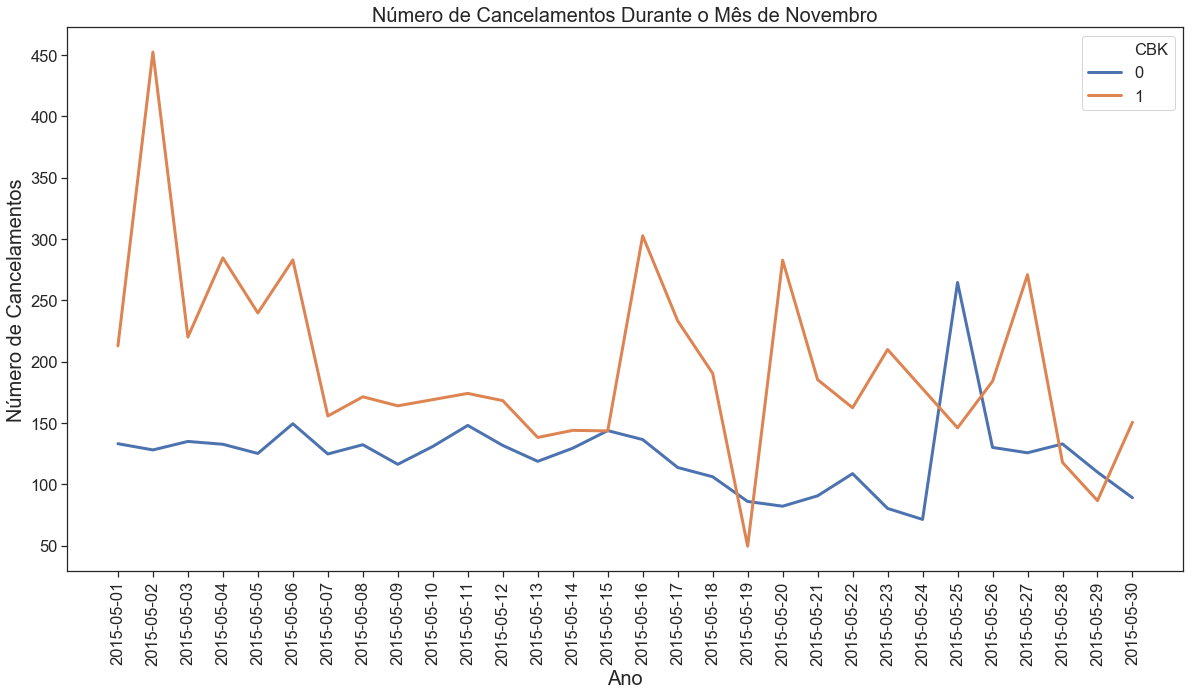

In [12]:
sns.set(style='ticks', font_scale=1.5, rc={"lines.linewidth": 3.0,"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
plt.figure(figsize=(20,10))
sns.lineplot(x='Dia', y='Valor', 
            hue='CBK',
            ci = None,
            data=train)
#plt.xticks(train['Dia'])
plt.xticks(rotation=90)
plt.xlabel('Ano')
plt.ylabel('Número de Cancelamentos')
plt.title('Número de Cancelamentos Durante o Mês de Novembro')
#sns.despine()
plt.show()

In [13]:
dataset = train.groupby(['CBK'])['Cartão'].value_counts().to_frame()
dataset = dataset.rename(columns={'Cartão':'Total'})
dataset = dataset.reset_index()
dataset = dataset.groupby('CBK').apply(lambda x: x.nlargest(10, 'Total')).reset_index(drop=True)
dataset = dataset.loc[(dataset['CBK']==1)]
dataset = dataset.sort_values(['Total']).reset_index(drop=True)
dataset.head(10)

,CBK,Cartão,Total
0,1,4002171353,8
1,1,4984066424,8
2,1,4032460294,9
3,1,4984080601,10
4,1,5464525160,10
5,1,4002177228,12
6,1,4984072077,12
7,1,5448288377,15
8,1,5213972711,20
9,1,5522897788,20


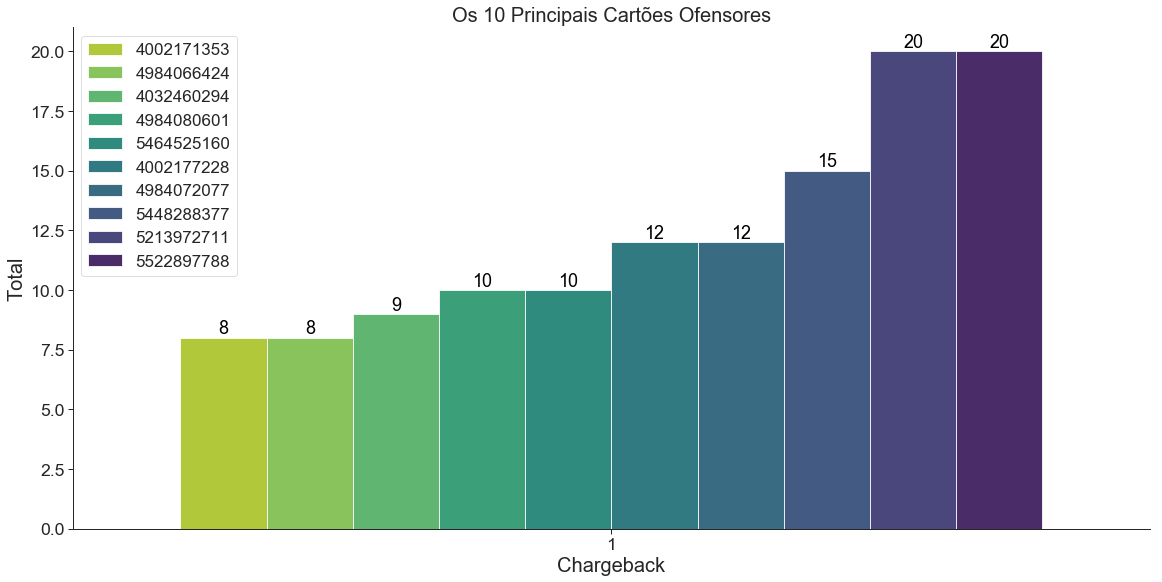

In [14]:
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_style('ticks')
sns.catplot(x='CBK', y='Total', 
            hue='Cartão', 
            palette = "viridis_r",
            ci = None,
            data=dataset, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            hue_order=dataset['Cartão'],
            kind='bar')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=18, color='black', ha='center', va='bottom')
plt.xlabel('Chargeback')
plt.ylabel('Total')
plt.title('Os 10 Principais Cartões Ofensores')
plt.legend(fontsize=17)
plt.show()

In [15]:
max(test['Valor'])

'99.26'

In [16]:
train['Frequencia'] = train.groupby('Cartão')['Cartão'].transform('count')
test['Frequencia'] = test.groupby('Cartão')['Cartão'].transform('count')

train['Valor_bins'] = pd.cut(train['Valor'], 10)
valor_bins = train.groupby(['Valor_bins'])['CBK'].count().to_frame().reset_index()
valor_bins.head(10)

,Valor_bins,CBK
0,"(-1.919, 292.9]",10321
1,"(292.9, 584.8]",647
2,"(584.8, 876.7]",105
3,"(876.7, 1168.6]",23
4,"(1168.6, 1460.5]",19
5,"(1460.5, 1752.4]",4
6,"(1752.4, 2044.3]",4
7,"(2044.3, 2336.2]",2
8,"(2336.2, 2628.1]",1
9,"(2628.1, 2920.0]",2


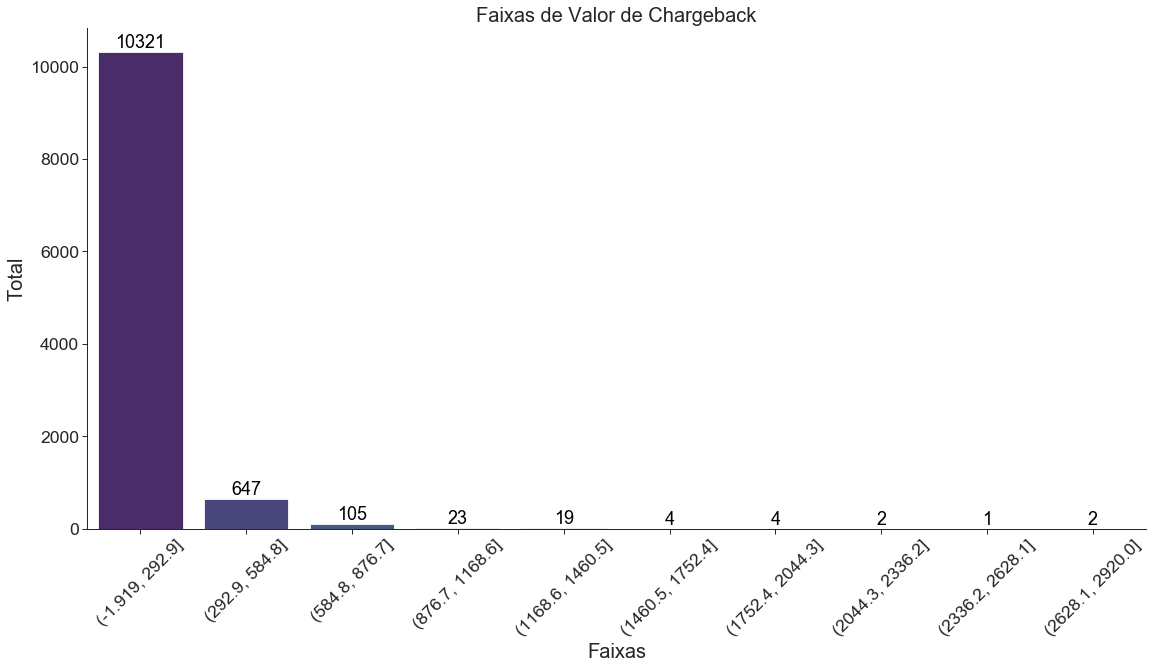

In [17]:
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.catplot(x='Valor_bins', y='CBK', 
            #hue='Cartão', 
            palette = "viridis",
            ci = None,
            data=valor_bins, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            #hue_order=dataset['Cartão'],
            kind='bar')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=18, color='black', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.xlabel('Faixas')
plt.ylabel('Total')
plt.title('Faixas de Valor de Chargeback')
plt.show()

In [18]:
train.loc[train['Valor'] <= 50, 'Valor'] = 0
train.loc[(train['Valor'] > 50) & (train['Valor'] <= 100), 'Valor'] = 1
train.loc[(train['Valor'] > 100) & (train['Valor'] <= 150), 'Valor'] = 2
train.loc[(train['Valor'] > 150) & (train['Valor'] <= 200), 'Valor'] = 3
train.loc[(train['Valor'] > 200) & (train['Valor'] <= 250), 'Valor'] = 4
train.loc[(train['Valor'] > 250) & (train['Valor'] <= 300), 'Valor'] = 5
train.loc[(train['Valor'] > 300) & (train['Valor'] <= 350), 'Valor'] = 6
train.loc[(train['Valor'] > 350) & (train['Valor'] <= 400), 'Valor'] = 7
train.loc[(train['Valor'] > 400) & (train['Valor'] <= 450), 'Valor'] = 8
train.loc[(train['Valor'] > 450) & (train['Valor'] <= 500), 'Valor'] = 9
train.loc[(train['Valor'] > 500) & (train['Valor'] <= 600), 'Valor'] = 10
train.loc[(train['Valor'] > 600) & (train['Valor'] <= 700), 'Valor'] = 11
train.loc[(train['Valor'] > 700) & (train['Valor'] <= 800), 'Valor'] = 12
train.loc[(train['Valor'] > 800) & (train['Valor'] <= 900), 'Valor'] = 13
train.loc[(train['Valor'] > 900) & (train['Valor'] <= 1000), 'Valor'] = 14
train.loc[train['Valor'] > 1000, 'Valor'] = 15

test['Valor'] = test['Valor'].astype(float)
test.loc[test['Valor'] <= 50, 'Valor'] = 0
test.loc[(test['Valor'] > 50) & (test['Valor'] <= 100), 'Valor'] = 1
test.loc[(test['Valor'] > 100) & (test['Valor'] <= 150), 'Valor'] = 2
test.loc[(test['Valor'] > 150) & (test['Valor'] <= 200), 'Valor'] = 3
test.loc[(test['Valor'] > 200) & (test['Valor'] <= 250), 'Valor'] = 4
test.loc[(test['Valor'] > 250) & (test['Valor'] <= 300), 'Valor'] = 5
test.loc[(test['Valor'] > 300) & (test['Valor'] <= 350), 'Valor'] = 6
test.loc[(test['Valor'] > 350) & (test['Valor'] <= 400), 'Valor'] = 7
test.loc[(test['Valor'] > 400) & (test['Valor'] <= 450), 'Valor'] = 8
test.loc[(test['Valor'] > 450) & (test['Valor'] <= 500), 'Valor'] = 9
test.loc[(test['Valor'] > 500) & (test['Valor'] <= 600), 'Valor'] = 10
test.loc[(test['Valor'] > 600) & (test['Valor'] <= 700), 'Valor'] = 11
test.loc[(test['Valor'] > 700) & (test['Valor'] <= 800), 'Valor'] = 12
test.loc[(test['Valor'] > 800) & (test['Valor'] <= 900), 'Valor'] = 13
test.loc[(test['Valor'] > 900) & (test['Valor'] <= 1000), 'Valor'] = 14
test.loc[test['Valor'] > 1000, 'Valor'] = 15

In [19]:
train.head()

,Dia,Hora,Valor,Cartão,CBK,Periodo,Frequencia,Valor_bins
0,2015-05-01,00:01:54,0.0,5365182108,0,Madrugada,2,"(-1.919, 292.9]"
1,2015-05-01,00:03:46,0.0,5365182108,0,Madrugada,2,"(-1.919, 292.9]"
2,2015-05-01,00:08:50,1.0,4532111239,0,Madrugada,1,"(-1.919, 292.9]"
3,2015-05-01,00:27:00,3.0,5488271705,0,Madrugada,1,"(-1.919, 292.9]"
4,2015-05-01,01:32:46,2.0,5316819778,0,Madrugada,1,"(-1.919, 292.9]"


In [20]:
test.head()

,Dia,Hora,Valor,Cartão,CBK,Periodo,Frequencia
0,2015-06-01,00:02:25,2.0,5415555965,nan,Madrugada,1
1,2015-06-01,00:30:45,2.0,4066697350,nan,Madrugada,1
2,2015-06-01,00:43:20,0.0,5411874535,nan,Madrugada,1
3,2015-06-01,00:46:46,1.0,5549275629,nan,Madrugada,1
4,2015-06-01,00:47:50,0.0,4984072077,nan,Madrugada,7


In [21]:
X = train.drop(['CBK','Valor_bins'], axis=1)
x_dummy = pd.get_dummies(X)
x_dummy = x_dummy.reindex(labels=X.columns,axis=1)
X_train = x_dummy.values
X_train = np.nan_to_num(X_train)
Y_train = train['CBK']
X_test = test.drop('CBK', axis=1)
x_dummy_test = pd.get_dummies(X_test)
x_dummy_test = x_dummy_test.reindex(labels=X_test.columns,axis=1)
X_test = x_dummy_test.values
X_test = np.nan_to_num(X_test)
X_train.shape, Y_train.shape, X_test.shape

((11128, 6), (11128,), (11820, 6))

In [22]:
def plot_metrics(model):
    
    pred = model_selection.cross_val_predict(model,X_train, Y_train)
    array = metrics.confusion_matrix(Y_train,pred)
    norm_array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
    print(metrics.classification_report(Y_train,pred))

    df_cm = pd.DataFrame(array, range(2),range(2))
    sns.heatmap(df_cm, annot=True, cmap='mako',fmt='g')
    plt.title('Matriz Confusão Não Normalizada')
    plt.show()
    print('')
    df_cm = pd.DataFrame(norm_array, range(2),range(2))
    df_cm = 100*df_cm
    df_cm = df_cm.round(2)
    sns.heatmap(df_cm, annot=True, cmap='mako',fmt='g')
    plt.title('Matriz Confusão Normalizada')
    plt.show()

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

96.27

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     10556
          1       0.71      0.42      0.53       572

avg / total       0.96      0.96      0.96     11128



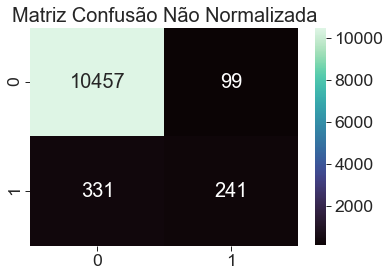

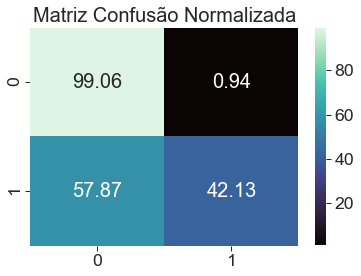

In [24]:
plot_metrics(logreg)

In [25]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

96.37

             precision    recall  f1-score   support

          0       0.96      0.99      0.98     10556
          1       0.75      0.33      0.46       572

avg / total       0.95      0.96      0.95     11128



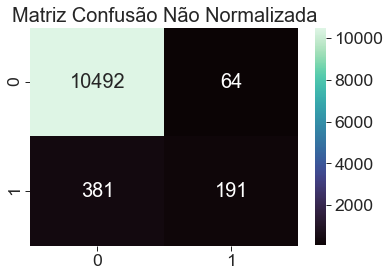

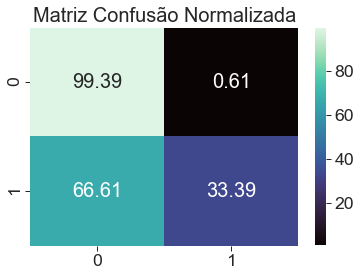

In [26]:
plot_metrics(svc)

In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

96.41

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     10556
          1       0.64      0.39      0.49       572

avg / total       0.95      0.96      0.95     11128



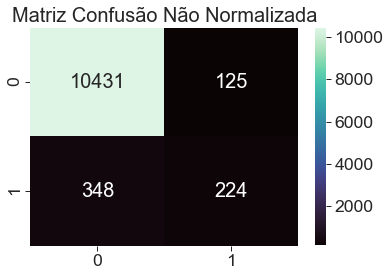

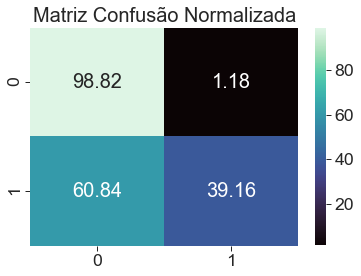

In [28]:
plot_metrics(knn)

In [44]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

95.26

             precision    recall  f1-score   support

          0       0.98      0.96      0.97     10556
          1       0.50      0.66      0.57       572

avg / total       0.96      0.95      0.95     11128



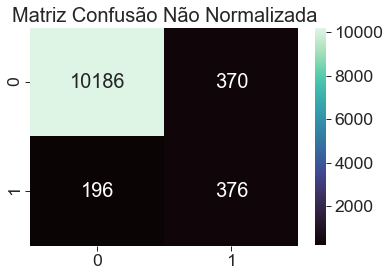

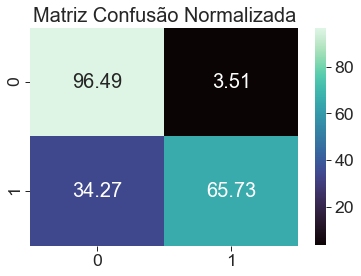

In [30]:
plot_metrics(gaussian)

In [31]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

95.89

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     10556
          1       0.73      0.39      0.50       572

avg / total       0.96      0.96      0.96     11128



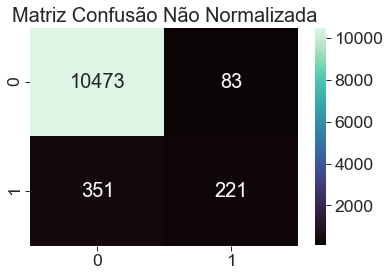

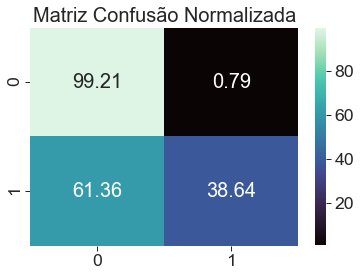

In [32]:
plot_metrics(perceptron)

In [33]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

96.27

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     10556
          1       0.76      0.39      0.51       572

avg / total       0.96      0.96      0.96     11128



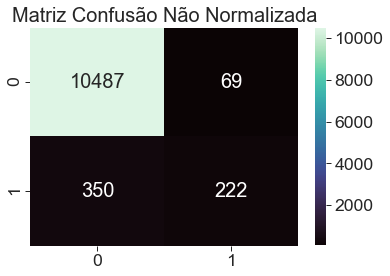

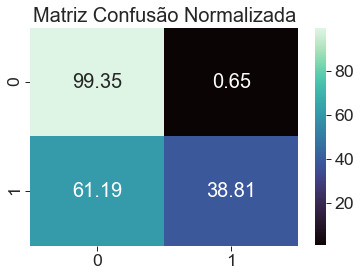

In [34]:
plot_metrics(linear_svc)

In [42]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

95.91

             precision    recall  f1-score   support

          0       0.96      0.98      0.97     10556
          1       0.46      0.33      0.38       572

avg / total       0.94      0.95      0.94     11128



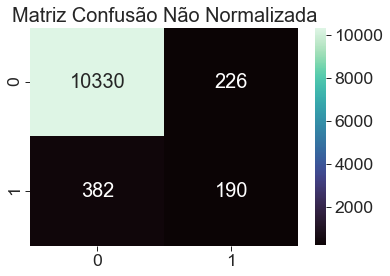

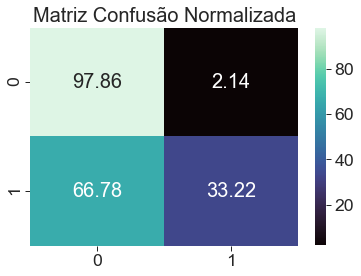

In [36]:
plot_metrics(sgd)

In [37]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

96.76

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     10556
          1       0.65      0.39      0.48       572

avg / total       0.95      0.96      0.95     11128



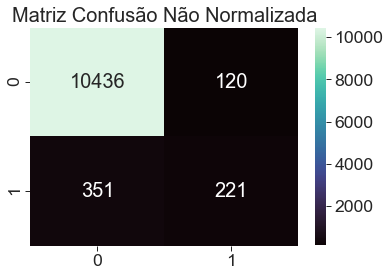

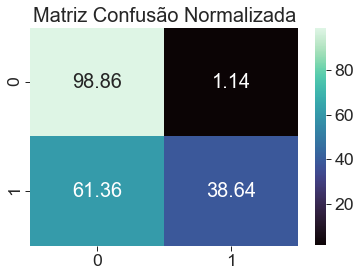

In [38]:
plot_metrics(decision_tree)

In [39]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

96.76

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     10556
          1       0.63      0.40      0.48       572

avg / total       0.95      0.96      0.95     11128



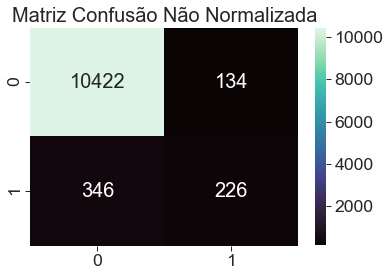

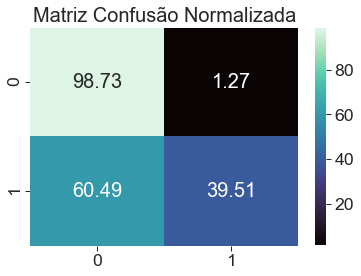

In [40]:
plot_metrics(random_forest)

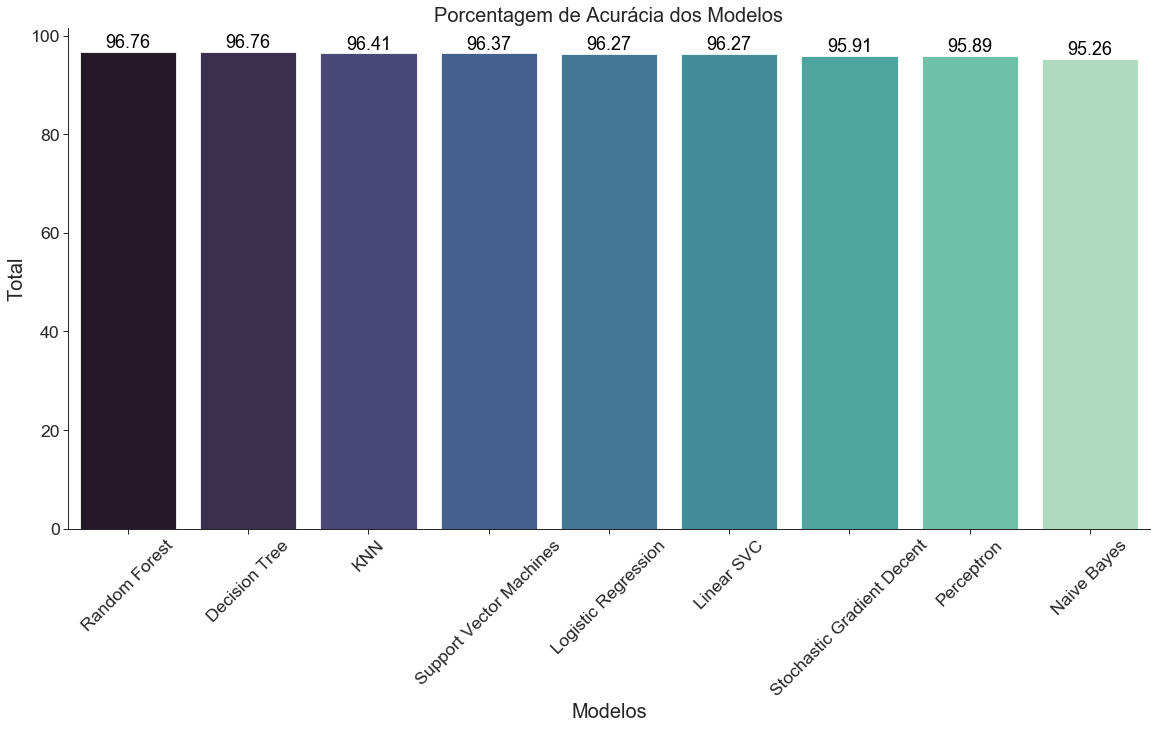

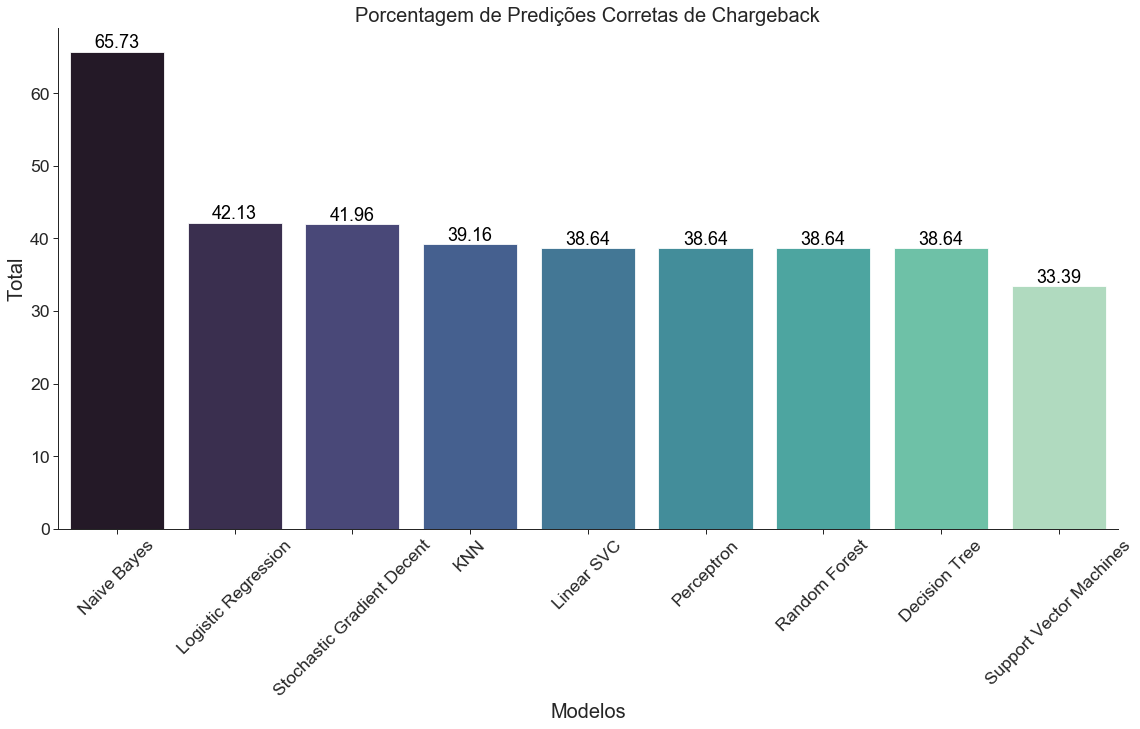

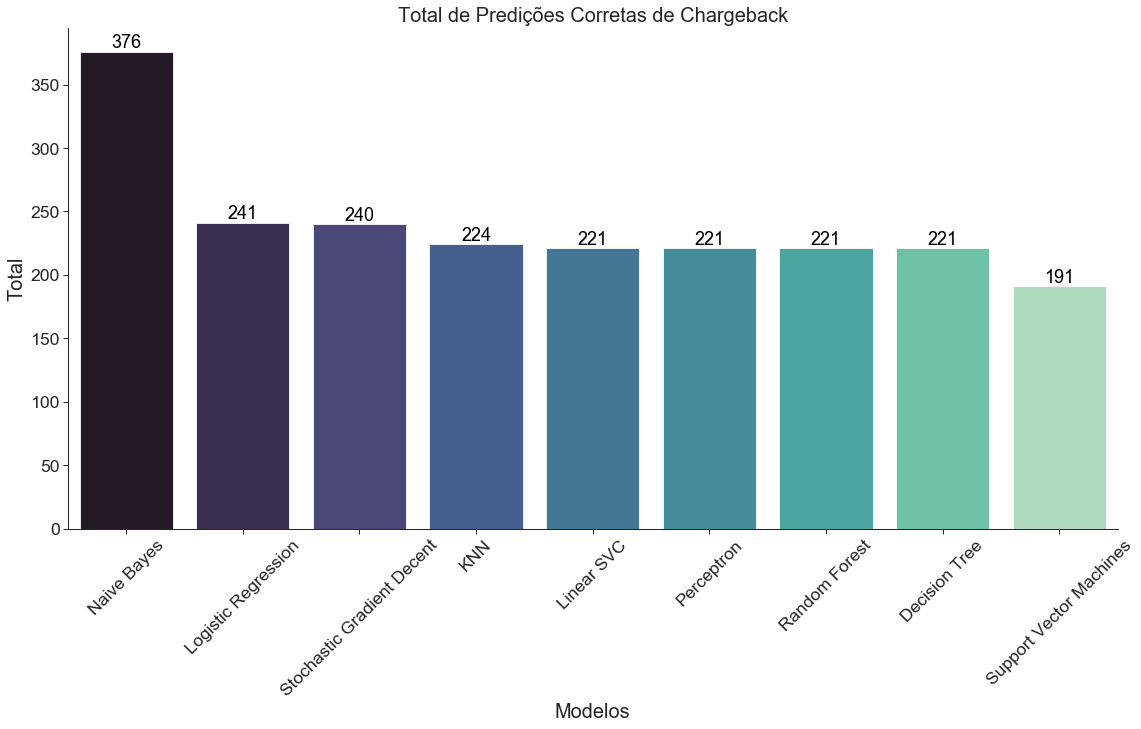

In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree],
    'Predict_CB_percent':[33.39,39.16,42.13,38.64,65.73,38.64,41.96,38.64,38.64],
    'Predict_CB_values':[191,224,241,221,376,221,240,221,221]})
models.sort_values(by='Score', ascending=False)
# models.head(10)

sns.set_style('ticks')
sns.catplot(x='Model', y='Score', 
            #hue='state', 
            palette = "mako",
            ci = None,
            data=models,
            order=['Random Forest','Decision Tree', 'KNN', 'Support Vector Machines',
                   'Logistic Regression','Linear SVC', 'Stochastic Gradient Decent', 'Perceptron',
                   'Naive Bayes'],
            height=8.27, 
            aspect=20/10,
            kind='bar')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
            fontsize=18, color='black', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.xlabel('Modelos')
plt.ylabel('Total')
plt.title('Porcentagem de Acurácia dos Modelos')

sns.set_style('ticks')
sns.catplot(x='Model', y='Predict_CB_percent', 
            #hue='state', 
            palette = "mako",
            ci = None,
            data=models,
            order=['Naive Bayes','Logistic Regression','Stochastic Gradient Decent', 
                         'KNN','Linear SVC','Perceptron','Random Forest','Decision Tree',
                         'Support Vector Machines'],
            height=8.27, 
            aspect=20/10,
            kind='bar')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
            fontsize=18, color='black', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.xlabel('Modelos')
plt.ylabel('Total')
plt.title('Porcentagem de Predições Corretas de Chargeback')

sns.set_style('ticks')
sns.catplot(x='Model', y='Predict_CB_values', 
            #hue='state', 
            palette = "mako",
            ci = None,
            data=models,
            order=['Naive Bayes','Logistic Regression','Stochastic Gradient Decent', 
                   'KNN','Linear SVC','Perceptron','Random Forest','Decision Tree',
                   'Support Vector Machines'],
            height=8.27, 
            aspect=20/10,
            kind='bar')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=18, color='black', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.xlabel('Modelos')
plt.ylabel('Total')
plt.title('Total de Predições Corretas de Chargeback')
plt.show()

In [47]:
submission = pd.DataFrame({
        "Dia": test["Dia"],
        "Hora": test["Hora"],
        "Valor": test["Valor"],
        "Cartão": test["Cartão"],
        "CBK": Y_pred
    })

In [48]:
submission.head(50)

,CBK,Cartão,Dia,Hora,Valor
0,0,5415555965,2015-06-01,00:02:25,2.0
1,0,4066697350,2015-06-01,00:30:45,2.0
2,0,5411874535,2015-06-01,00:43:20,0.0
3,0,5549275629,2015-06-01,00:46:46,1.0
4,1,4984072077,2015-06-01,00:47:50,0.0
5,1,4984072077,2015-06-01,00:48:51,0.0
6,1,4984072077,2015-06-01,00:49:55,0.0
7,1,4984072077,2015-06-01,00:51:08,0.0
8,1,4984072077,2015-06-01,00:53:28,4.0
9,1,4984072077,2015-06-01,00:54:39,4.0
